# CS5242

## Load Data

In [1]:
from data import Data

train_data = Data(data_type='train')
test_data = Data(data_type='test')

print("Train data: x:"+ str(train_data.x.shape)+ ' y:'+str(train_data.y.shape))
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(18662, 1000, 10) y:(18662, 1)
Test data: x:(6051, 1000, 10) y:(6051, 1)


## Model

In [2]:
import tensorflow as tf

model_name = 'model_last_10'

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256),
#     tf.keras.layers.Dropout(rate=0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

## Save Checkpoint

In [3]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './checkpoints/' + model_name
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

## Training

In [4]:
history = model.fit(x=train_data.x, y=train_data.y, validation_split=0.2, epochs=2000,batch_size=32,
                    callbacks=[checkpoint_callback], verbose=2,shuffle=True)

Train on 14929 samples, validate on 3733 samples
Epoch 1/2000
14929/14929 - 26s - loss: 0.2223 - accuracy: 0.6468 - val_loss: 0.2260 - val_accuracy: 0.7045
Epoch 2/2000
14929/14929 - 24s - loss: 0.1892 - accuracy: 0.7112 - val_loss: 0.2107 - val_accuracy: 0.7359
Epoch 3/2000
14929/14929 - 24s - loss: 0.1823 - accuracy: 0.7122 - val_loss: 0.2216 - val_accuracy: 0.7541
Epoch 4/2000
14929/14929 - 24s - loss: 0.1804 - accuracy: 0.7243 - val_loss: 0.2066 - val_accuracy: 0.7557
Epoch 5/2000
14929/14929 - 24s - loss: 0.1763 - accuracy: 0.7311 - val_loss: 0.1937 - val_accuracy: 0.7731
Epoch 6/2000
14929/14929 - 25s - loss: 0.1598 - accuracy: 0.7808 - val_loss: 0.1709 - val_accuracy: 0.7836
Epoch 7/2000
14929/14929 - 25s - loss: 0.1466 - accuracy: 0.8059 - val_loss: 0.1532 - val_accuracy: 0.8069
Epoch 8/2000
14929/14929 - 26s - loss: 0.1342 - accuracy: 0.8189 - val_loss: 0.1463 - val_accuracy: 0.8098
Epoch 9/2000
14929/14929 - 25s - loss: 0.1274 - accuracy: 0.8283 - val_loss: 0.1383 - val_accur

## Plot Training History

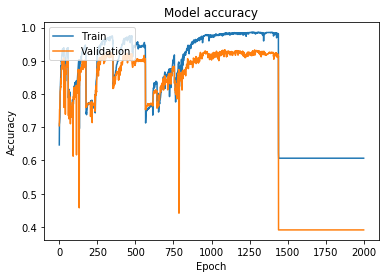

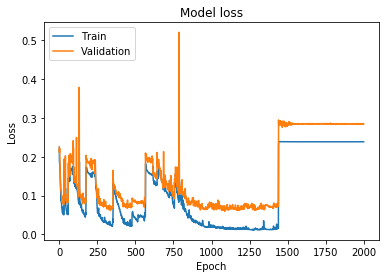

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  multiple                  273408    
_________________________________________________________________
dense (Dense)                multiple                  32896     
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  8256      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 314,625
Trainable params: 314,625
Non-trainable params: 0
__________________________________________________

## Restore Weights

In [7]:
checkpoint_dir = './checkpoints/' + model_name
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

In [8]:
test_predict = model.predict(test_data.x)
print(test_predict.shape)

(6051, 1)




## Save Prediction to CSV

In [9]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(test_predict):
        csv_writer.writerow((id, predict[0]))